In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

np.random.seed(7)

In [2]:
train_path =  'patients.csv'
train_df = pd.read_csv(train_path,',')

In [3]:
train_df.head(1)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.9,34,23,1,1.0,0,45961,48071,NaN,2,1,1


In [39]:
abnormality = pd.Categorical(train_df["Blood_Pressure_Abnormality"])
abnormality

[1, 0, 1, 0, 1, ..., 1, 1, 1, 0, 1]
Length: 2000
Categories (2, int64): [0, 1]

In [40]:
abnormality = abnormality.rename_categories(["Normal","Abnormal"])
abnormality.describe()

,counts,freqs
categories,,
Normal,1012,0.506
Abnormal,988,0.494


In [41]:
Fill_train_df = train_df.copy(deep=False)
Fill_train_df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,6,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,8,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,9,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,10,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [42]:
missing_Gen_Info = np.where(Fill_train_df["Genetic_Pedigree_Coefficient"].isnull() == True)

missing_Gen_Info

(array([  23,   44,   56,   68,   85,  102,  132,  149,  175,  187,  201,
         227,  233,  247,  277,  292,  339,  352,  397,  432,  438,  460,
         473,  491,  496,  503,  518,  526,  547,  565,  578,  652,  661,
         670,  684,  753,  756,  792,  833,  843,  873,  878,  894,  903,
         906,  925,  941,  944,  987, 1005, 1014, 1030, 1052, 1056, 1067,
        1074, 1125, 1127, 1133, 1147, 1166, 1178, 1188, 1196, 1210, 1267,
        1277, 1281, 1287, 1311, 1333, 1348, 1356, 1381, 1409, 1467, 1525,
        1563, 1570, 1593, 1701, 1712, 1721, 1739, 1751, 1855, 1857, 1907,
        1921, 1964, 1972, 1984]),)

In [45]:
Fill_train_df["Genetic_Pedigree_Coefficient"]

0       0.90
1       0.23
2       0.91
3       0.43
4       0.83
5       0.54
6       0.75
7       0.41
8       0.68
9       0.61
10      0.13
11      0.10
12      0.45
13      0.13
14      0.76
15      0.10
16      0.06
17      0.09
18      0.17
19      0.91
20      0.98
21      0.57
22      0.75
23       NaN
24      0.69
25      0.87
26      0.69
27      0.74
28      0.95
29      0.28
        ... 
1970    0.89
1971    0.74
1972     NaN
1973    0.07
1974    0.06
1975    0.02
1976    0.68
1977    0.36
1978    0.66
1979    0.56
1980    0.23
1981    0.86
1982    0.54
1983    0.27
1984     NaN
1985    0.38
1986    0.97
1987    0.97
1988    0.10
1989    0.66
1990    0.01
1991    0.12
1992    0.49
1993    1.00
1994    0.66
1995    0.02
1996    1.00
1997    0.22
1998    0.72
1999    0.09
Name: Genetic_Pedigree_Coefficient, Length: 2000, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa077d5b080>]],
      dtype=object)

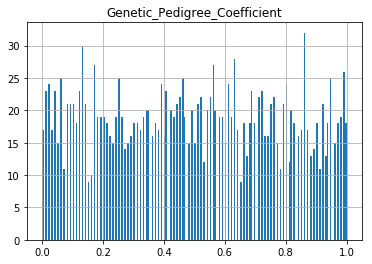

In [61]:
train_df.hist(column='Genetic_Pedigree_Coefficient',bins=200)